PostId: 2019-01-31-115955
Title:Elements of Information Theoryを読む

そろそろ情報理論を真面目にやるか、と決意して、以下の本を読み始める。

<iframe style="width:120px;height:240px;" marginwidth="0" marginheight="0" scrolling="no" frameborder="0" src="https://rcm-fe.amazon-adsystem.com/e/cm?ref=qf_sp_asin_til&t=karino203-22&m=amazon&o=9&p=8&l=as1&IS1=1&detail=1&asins=B00HLG9ISQ&bc1=ffffff&lt1=_top&fc1=333333&lc1=0066c0&bg1=ffffff&f=ifr"> </iframe>

これはGoodfellow本から参照されてた二冊の本のうちの一つで、サイコロ本でも確か言及されてて、Kindle版があった、みたいな基準で選んだ。

## 1.1 Mutual Informationの計算

Example 1.1.3とかをやっておく。
まず必要な事を簡単にメモ。

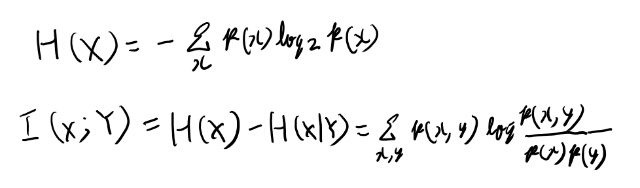

In [1]:
MeatPieImage()

最後の式は簡単に確認しておくか。

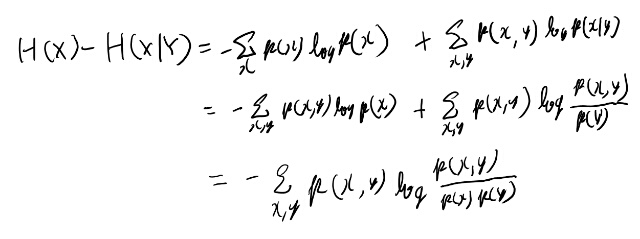

In [1]:
MeatPieImage()

conditional entropyは式2.10に定義がある。
条件付き確率の期待値なので同時分布の和になる。

### ノイズなしバイナリチャンネル（Ex 1.1.3）

information capacityは1ビットとなる、と言ってるが、定義に従い計算してみよう。

まず、xが0か1を等確率で送る場合の計算をしてみる。

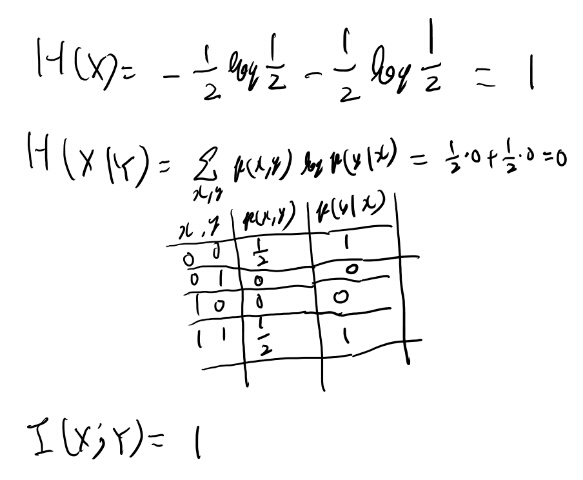

In [1]:
MeatPieImage()

結局p(x|y)はいつも1か0で、0の時は同時確率がゼロだから寄与しない。
という事でいつもxのエントロピーと一致するのか。

ではエントロピーが最大になるxは？という事になり、これは変分法で凸関数がどうとかになる話と思うが、離散的な上くらいの例なら1となる確率をp、0となる確率を1-pとしてpで微分、とかで出そう。
実際p(1-p)はpが1/2の時最大だろう。 

（追記: Example 2.1.1に解説があった）

なるほど、xの分布を変えて最大値を狙う、というのがinformation capacityという概念か。

### バイナリ対称チャンネル（ex 1.1.5）

これも計算してみよう。xは等確率で0か1で良かろう。
とりあえず必要な表を書く。

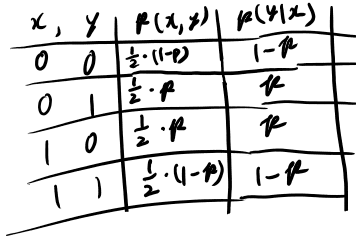

In [1]:
MeatPieImage()

なるほど。これを使って定義に従って計算してみる。

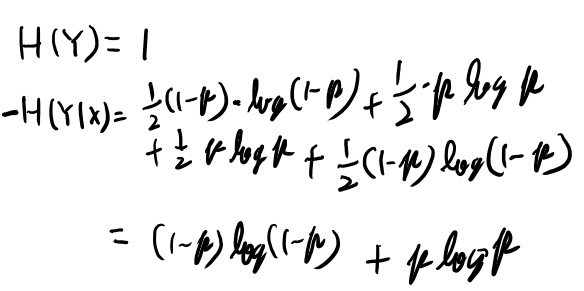

In [1]:
MeatPieImage()

なりそうだね。

## 2.2 conditional entropy

2.1は特に分からない事は無かったのでさらさら読む。
2.2のconditional entropyはちょっとメモを残したくなったのでメモ。

conditional entropyを考える時、条件付き確率は、古典的にはなんらかのXの実現値に対して定義される。
なので、$$H(Y| X=x)$$は自然に定義出来るが、これのXでの期待値が$$H(Y| X)$$の定義になる。

すると式2.10からの一連の変形で2.12のように定義される。
一応自分でも確認しておこう。

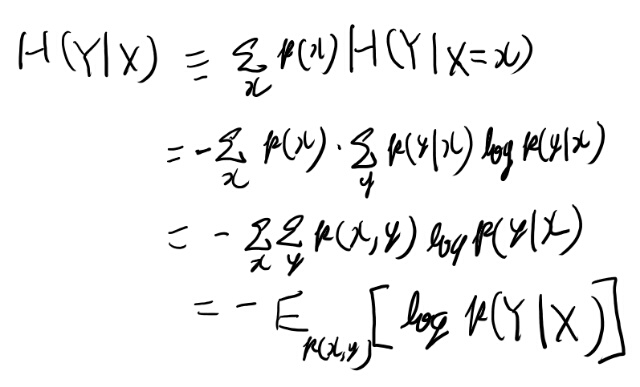

In [1]:
MeatPieImage()

実解析でちゃんと扱えば集合論的に出せそうな結論だが、ゆとりなのでそういうのはしない。

一応チェインルールもメモしておこう。

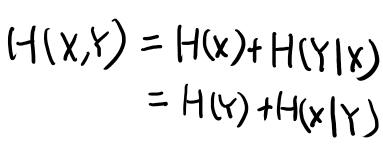

In [1]:
MeatPieImage()

### Example 2.2.1 Conditional entropyを手計算してみる

やってみよう。

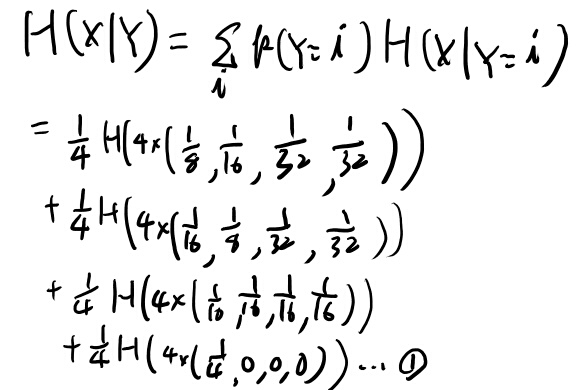

In [1]:
MeatPieImage()

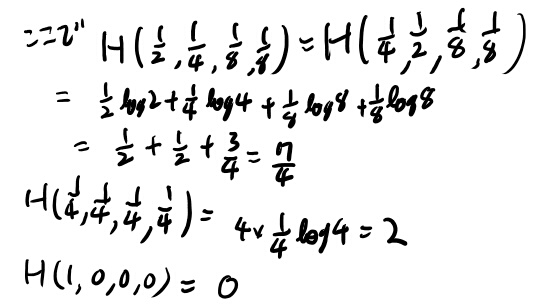

In [1]:
MeatPieImage()

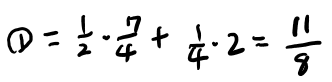

In [1]:
MeatPieImage()

ちょっと慣れてきた。こういう問題解くって大切だよなぁ。

## mutual informationとKLダイバージェンス

relative entropyはKLダイバージェンスの事。定義はまぁいいだろう。

mutual informationは、同時分布とマージナルの積のKLダイバージェンスで定義は以下。

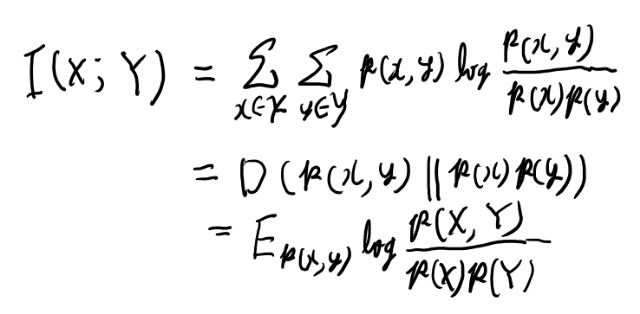

In [1]:
MeatPieImage()

図2.2はなかなかわかりやすいのでメモしておく。

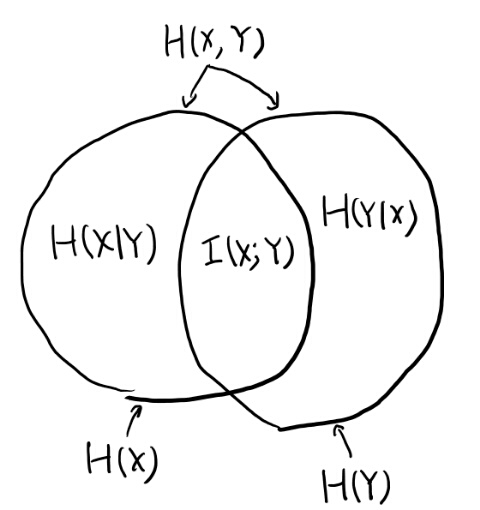

In [1]:
MeatPieImage()

次のConditronal mutual informationもこの図で考えるとわかりやすいな。

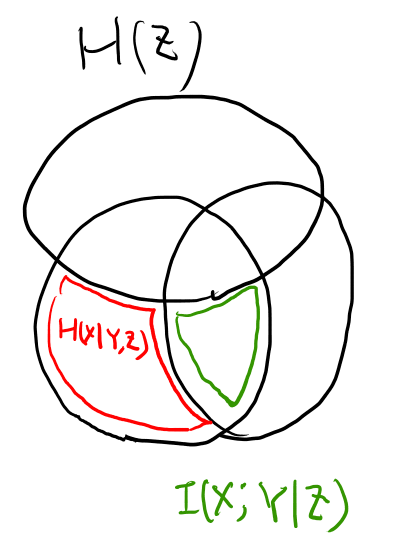

In [1]:
MeatPieImage()

conditionalなrelative entropyが2.65で出てくるが、ちょっと積分対象が予想外なのでメモしておく。

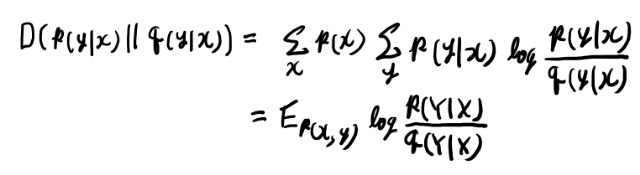

In [1]:
MeatPieImage()

p(x)での和が入るのが、直感的には分かりにくい所だな。xの側もボレル集合族の集合にしたいと思えば自然なのだが。

ところで条件付きrelative entropyは条件付きKLダイバージェンスって呼ぶのかね？
あんま聞かないが。

## KLダイバージェンスがconvexとは

定理2.7.2でさらりと定義が書いてあるがあまり知らない概念なのでメモしておく。

KLダイバージェンスがconvexである、とは、$$( { p_1}, { q_1})$$と$$( { p_2}, { q_2})$$がもし2つのペアのprobability mass functionなら、

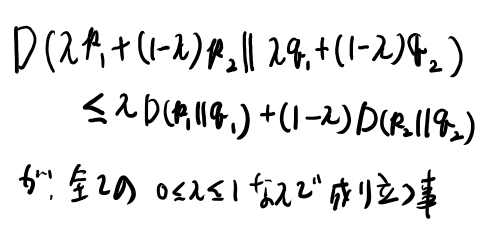

In [1]:
MeatPieImage()

なかなか難しいが、pとqを無限次元のベクトルと思えば、p1, q1とp2, q2の間の点について述べていると思えば通常のconvexの定義と等しい。
なかなかヒルベルト空間だな…

なおこれは成り立ってるのでconvexとの事。

### Mutual informationがconcave（定理 2.7.4）

Mutual informationがp(y│x)を固定するとp(x)についてconcave、またp(x)を固定するとp(y│x)についてconcaveとの事。

汎関数のconcaveについて良い練習になってそうなので計算を追ってみる。

まず前半。条件付き確率を固定すると、p(y)はp(x)のlinear functionだと言ってる。
どういう意味だろう？

まずp(y│x)を固定と言っても定数という訳じゃない。だからp(y)はp(x)の定数倍という訳じゃない（そもそも積分したら1なので定数倍はありえない）。
だからヒルベルトスペース上での話をしてるんだろうなぁ。

良く分からないので、H(Y)がconcaveかを定義に従って見てみよう。
まずLog sum不等式を書いておく。（定理2.7.1）

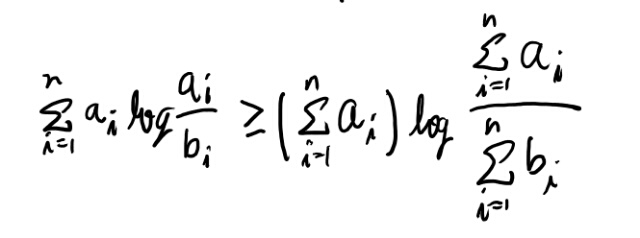

In [1]:
MeatPieImage()

これをつかってKLダイバージェンスがconcaveなのが示せるらしい（定理2.7.2）

そして一様分布とのKLダイバージェンスと合わせて考えてEntropyがconcaveなのが示せるとか。

それを使ってこのmutual informationについての定理2.7.4が示せるらしい。
やってみよう。

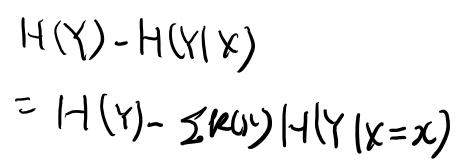

In [1]:
MeatPieImage()

**p(y│x)を固定するとp(x)についてconcave**

まずはp(y│x)を固定する方を考えてみる。
この時p(x)についてconcaveとは？

解説にはp(y)がp(x)のlinear functionになる、と書いてあるが、さっぱり意味が分からない。p(y│x)は固定するとは言っているが関数なのでは？

こういうのはちゃんと定義に従って書いていくのが良さそう。
まずp(y│x)を固定してp(y)との関係を考えるのだから、同時分布をマージナライズすれば良かろう。

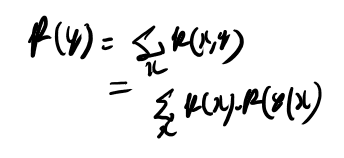

In [1]:
MeatPieImage()

さて、p(x)についてconcave、というのは、p1とp2の2つの関数についての概念だよな。

まずp(y)についてエントロピーがconcaveなのは前に証明してあるので、これを使おうとしてみよう。
Yのエントロピーの、concaveの定義の式の左辺を書いて変形していってみる。

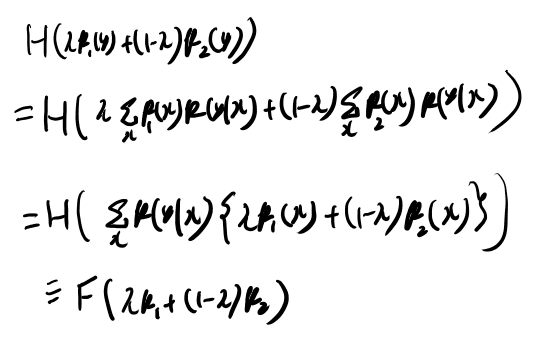

In [1]:
MeatPieImage()

最初はマージナライズして消えちゃうじゃん、と思ってたが、それが関数に依存する値になるので、一歩引いて考えればそれは何らかの汎関数なんだよな。
それをFと置いてみると、これはqの汎関数になってる。

右辺も同様に変形してみよう。

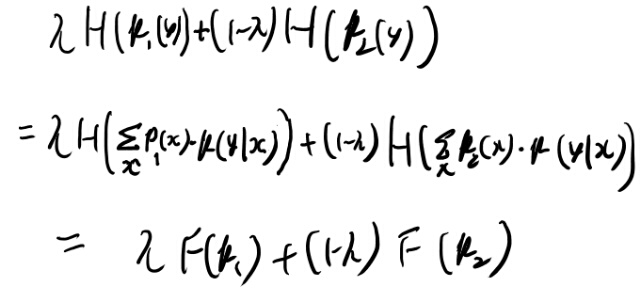

In [1]:
MeatPieImage()

これはp(x)についてconcaveだ。なるほど。こういう事か。

さて、第二項のHの方はもともとp(x)には依存してない。
で、p(x)に固定の関数を掛けて和を取った物になっている。

これは、

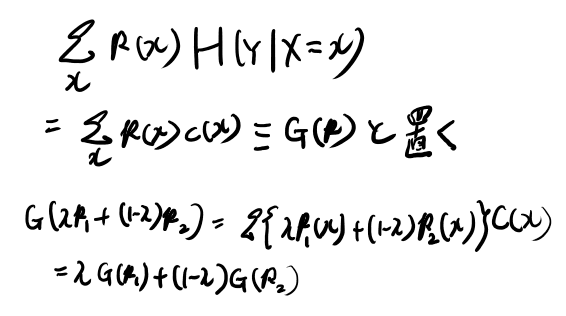

In [1]:
MeatPieImage()

なるほど。線型変換は足しても引いてもcovexityに影響は与え無さそうだな。納得した。

**p(x)を固定するとp(y│x)についてconcave**

次に、p(x)をfixedにすると、p(y│x)に関してconcaveになる、という話。
これの証明が良い勉強になりそうなのでこちらも追ってみる。

まず前と同様に同時確率に結びつけたりxに関してマージナライズしたりしてみよう。

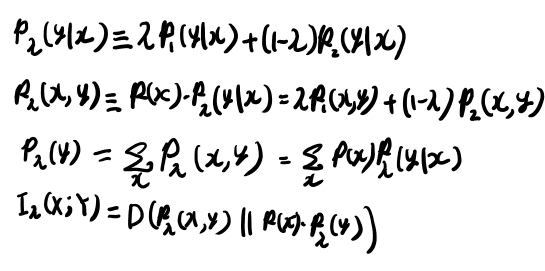

In [1]:
MeatPieImage()

ここから解説ではDがconvexだから、と言って終わってるが、いまいちなにを示したのかがついていけてない。

定義に従い、右辺も書いてみよう。

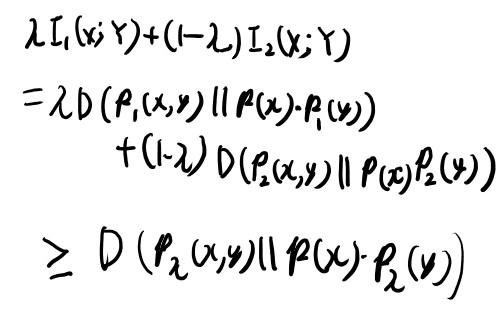

In [1]:
MeatPieImage()

ここまでは良い。この事実から、p(y│x)のconvexityにつなげたい。

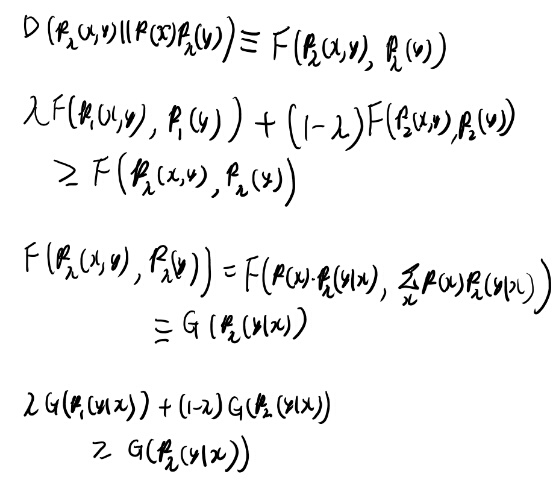

In [1]:
MeatPieImage()

言えた。具体的な計算は一切行って無いのだから当たり前のはずだが、何が当たり前かいまいち分からないな。

何かの汎関数がconcaveで、その引数の関数の内分点が、おなじ比率の別の何かの関数の内分点によって完全に決まるなら、この別の何かの関数に対してもconcave だ、という事を言ってる気がする。

この内分点がうんぬん、というのは、きっと線形変換と等価になる、、、のか？ちょっと自信は持てないが。

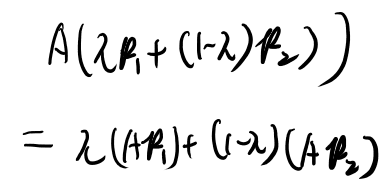

In [1]:
MeatPieImage()

これは線形変換だな。
一般のバナッハ空間に対しての線形変換はそんなにちゃんとは理解できてないが、たぶん言えそう。